In [9]:
 import tensorflow as tf
 gpus= tf.config.experimental.list_physical_devices('GPU')
 tf.config.experimental.set_memory_growth(gpus[0], True)

In [10]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf

path = 'dataset'


train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=340, 
                                          class_mode=None)

#Convert from RGB to Lab


X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
     
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)


#Encoder

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()


model.fit(X,Y,validation_split=0.1, epochs=1000, batch_size=16)

model.save('other_files/colorize_autoencoder.model')



0.8409 - val_loss: 0.0033 - val_accuracy: 0.6273
Epoch 868/1000
10/10 [==============================] - 2s 167ms/step - loss: 1.5286e-04 - accuracy: 0.8608 - val_loss: 0.0033 - val_accuracy: 0.6042
Epoch 869/1000
10/10 [==============================] - 2s 167ms/step - loss: 1.5098e-04 - accuracy: 0.8404 - val_loss: 0.0033 - val_accuracy: 0.6319
Epoch 870/1000
10/10 [==============================] - 2s 169ms/step - loss: 1.4952e-04 - accuracy: 0.8407 - val_loss: 0.0033 - val_accuracy: 0.6220
Epoch 871/1000
10/10 [==============================] - 2s 167ms/step - loss: 1.4848e-04 - accuracy: 0.8721 - val_loss: 0.0033 - val_accuracy: 0.5658
Epoch 872/1000
10/10 [==============================] - 2s 167ms/step - loss: 1.4653e-04 - accuracy: 0.8399 - val_loss: 0.0033 - val_accuracy: 0.5853
Epoch 873/1000
10/10 [==============================] - 2s 167ms/step - loss: 1.4504e-04 - accuracy: 0.8582 - val_loss: 0.0033 - val_accuracy: 0.5855
Epoch 874/1000
10/10 [=============================

'\ntf.keras.models.load_model(\n    \'other_files/colorize_autoencoder300.model\',\n    custom_objects=None,\n    compile=True)\nimg1_color=[]\nimg1=img_to_array(load_img(\'images/sunset.png\'))\nimg1 = resize(img1 ,(256,256))\nimg1_color.append(img1)\nimg1_color = np.array(img1_color, dtype=float)\nimg1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]\nimg1_color = img1_color.reshape(img1_color.shape+(1,))\noutput1 = model.predict(img1_color)\noutput1 = output1*128\nresult = np.zeros((256, 256, 3))\nresult[:,:,0] = img1_color[0][:,:,0]\nresult[:,:,1:] = output1[0]\nimsave("result.png", lab2rgb(result))\n'

W1017 18:12:52.177129 27144 util.py:58] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


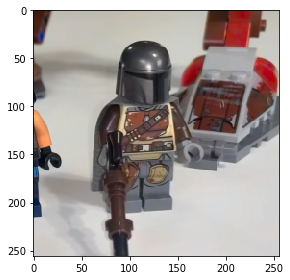

In [11]:
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
from skimage.color import rgb2lab, lab2rgb
###########################################################
#Load saved model and test on images.
#colorize_autoencoder.model is trained for 1000 epochs


model = tf.keras.models.load_model('other_files/colorize_autoencoder.model',
                                   custom_objects=None,
                                   compile=True)

img1_color=[]

img1=img_to_array(load_img('grey.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave("result.png", lab2rgb(result))